In [139]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_excel("진짜진짜최종.xlsx")
data.fillna(0, inplace=True)
data.columns

Index(['Unnamed: 0', '회사명', '거래소코드', '회계년도', '자산', '부채', '자본', '매출액', '매출원가',
       '매출총이익', '영업이익', '당기순이익', '유동자산', '당좌자산', '재고자산', '유동부채', '매출채권',
       '매입채무', '단기차입금', '장기차입금', '사채', '유형자산', '이익잉여금', '이자비용',
       '영업활동으로 인한 현금흐름', '투자활동으로 인한 현금흐름', '재무활동으로 인한 현금흐름', '이자수익', '법인세비용',
       '지분법이익', '지분법손실', '시총', '유동비율', '당좌비율', '부채비율', '차입금의존도', '이자보상배율',
       '매출총이익률', '영업이익률', '당기순이익률', 'ROA', 'ROE', '재고자산회전율', '매출채권회전율',
       '총자산회전율', '매입채무회전율', '현금순환주기', '매출액증가율', '영업이익증가율', '유형자산증가율', '총자산증가율',
       '복리후생비', '교육훈련비', '경상개발비', '기부금', '기말인원', '평균근속연수', '비정규직비율', '여성고용률',
       '공공조달은1', '패턴', '산업', '제품', '설립일', '상장일', '지역', 'Z-Score', 'Z-Score_ad',
       'K1_Score', 'k1-Score_ad', '종합 and', '종합 or'],
      dtype='object')

In [140]:
df_17_20 = data[data['회계년도']== (2017 or 2018 or 2019 or 2020)] #train/validate
df_21 = data[data['회계년도'] == 2021] #test

In [184]:

data = pd.read_csv("./진짜진짜최종.csv", encoding ="cp949",index_col=0)
data.fillna(0, inplace=True)

column_list = ['이자보상배율',
       '매출총이익률', '영업이익률', '당기순이익률', 'ROA', 'ROE', '재고자산회전율', '매출채권회전율',
       '총자산회전율', '매입채무회전율', '현금순환주기', '매출액증가율', '영업이익증가율', '유형자산증가율', '총자산증가율',
       '복리후생비', '교육훈련비', '경상개발비', '기부금', '기말인원', '평균근속연수', '비정규직비율', '여성고용률',
       '공공조달은1']

new_column_list = ['ROE', '복리후생비', '매출채권회전율', '매입채무회전율', '이자보상배율', '기말인원', '매출총이익률',
       '여성고용률', '매출액증가율', '영업이익증가율', '현금순환주기', '재고자산회전율', '평균근속연수', '기부금',
       '교육훈련비', '영업이익률', '총자산증가율', '공공조달은1', '총자산회전율', 'ROA', '당기순이익률',
       '유형자산증가율']

X = data[new_column_list]
df_17_20 = X[data['회계년도'].isin([2017,2018,2019,2020])] #train/validate
df_21 = X[data['회계년도'] == 2021] #test
y = data['k1-Score_ad']
y = y.apply(lambda x: 1 if(x=="부실" or x=="판정보류") else 0)
y_17_20=y[data['회계년도'].isin([2017,2018,2019,2020])] #train/validate
y_21 = y[data['회계년도'] == 2021] #test

X_train=df_17_20[new_column_list]
X_test=df_21[new_column_list]
y_train=y_17_20
y_test =y_21

In [115]:
new_y = df_17_20['k1-Score_ad']

print(sum(new_y=='부실'), sum(new_y=='판정보류'), sum(new_y=='건전'))

56 36 671


In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

#DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8702
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [143]:
X

array([[ 0.46935208,  0.16119517, -0.05757019, ...,  0.13495899,
         0.4564496 ,  6.70739279],
       [ 0.08143886,  0.17907949,  0.04776887, ...,  1.09633182,
        -0.53635417, -0.13080431],
       [ 0.0651205 , -2.1304519 ,  0.15315044, ..., -0.50595622,
        -0.58174304, -0.23492862],
       ...,
       [ 0.32677749,  0.29516141, -0.0572937 , ..., -0.82641383,
        -0.09861811,  1.03984495],
       [ 1.00400948,  0.25781292, -0.04571681, ..., -1.46732905,
        -0.19618375, -0.18382571],
       [-0.69246474, -0.44527469, -0.10860029, ..., -0.68398823,
        -0.24252529, -0.21737014]])

In [144]:
y

0       0
5       0
10      1
15      0
20      0
       ..
3790    0
3795    0
3800    0
3805    0
3810    0
Name: k1-Score_ad, Length: 763, dtype: int64

In [146]:
## 검증
X_21 = df_21[['ROE', '현금순환주기', '이자보상배율', '복리후생비', '영업이익증가율','매출총이익률', '총자산증가율',
        '비정규직비율', '총자산회전율', '기말인원', '유형자산증가율', '평균근속연수', '당좌비율', '교육훈련비']]

y_21 = df_21['k1-Score_ad']
y_21 = y_21.apply(lambda x: 1 if(x=="부실" or x=="판정보류") else 0)
st = StandardScaler()
X_21 = st.fit_transform(X_21)

pred_21 = dt_clf.predict(X_21)
accuracy_21 = accuracy_score(y_21, pred_21)
print('21년도 결정 트리 예측 정확도: {0:.4f}'.format(accuracy_21))

21년도 결정 트리 예측 정확도: 0.8309


In [186]:
from sklearn.model_selection import GridSearchCV

params = { 
    'max_depth': [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8804
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 6}


In [187]:
#GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.880400
1,8,0.870243
2,10,0.866636
3,12,0.848941
4,16,0.855172
5,20,0.855500
6,24,0.855500


In [188]:
max_depths = [6,8,10,12,16,20,24]
#max_depth 값을 변화시키면서 그때마다 학습과 데이터 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8899
max_depth = 8 정확도: 0.8650
max_depth = 10 정확도: 0.8585
max_depth = 12 정확도: 0.8663
max_depth = 16 정확도: 0.8585
max_depth = 20 정확도: 0.8493
max_depth = 24 정확도: 0.8493


In [189]:
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8676
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 24}


In [204]:
## 교차검증 cross_val
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

dt_clf = DecisionTreeClassifier(random_state=156)

#성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, X_train, y_train, scoring='accuracy', cv=5)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.8494 0.8674 0.859  0.8492 0.823 ]
평균 검증 정확도: 0.8496


In [203]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8781


ROE : 0.530
복리후생비 : 0.110
매출채권회전율 : 0.050
매입채무회전율 : 0.052
이자보상배율 : 0.040
기말인원 : 0.029
매출총이익률 : 0.032
여성고용률 : 0.033
매출액증가율 : 0.016
영업이익증가율 : 0.016
현금순환주기 : 0.015
재고자산회전율 : 0.008
평균근속연수 : 0.013
기부금 : 0.006
교육훈련비 : 0.013
영업이익률 : 0.008
총자산증가율 : 0.008
공공조달은1 : 0.000
총자산회전율 : 0.006
ROA : 0.006
당기순이익률 : 0.004
유형자산증가율 : 0.004


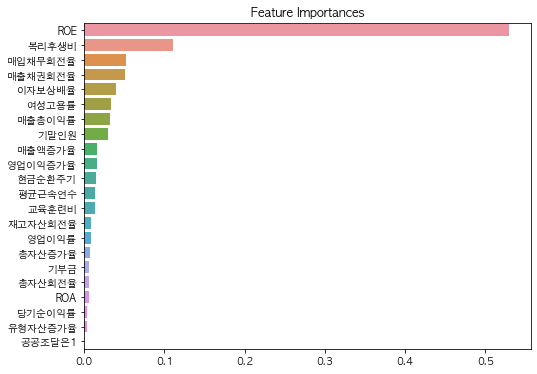

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

ftr_importances_values = best_df_clf.feature_importances_
#Top 중요도로 정렬을 쉽게 하고, 시본(seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# feature 별 importance 매핑
features = []
for name, value in zip(X_train.columns, ftr_importances_values) :
    print(f"{name} : {value:.3f}")
    features.append({name : np.round(value, 3)})


#중요도 값 순으로 Series 정렬
ftr_top14 = ftr_importances.sort_values(ascending=False)[:24]
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top14, y=ftr_top14.index)
plt.show()

In [183]:
ftr_top14.index

Index(['ROE', '복리후생비', '매출채권회전율', '매입채무회전율', '이자보상배율', '기말인원', '매출총이익률',
       '여성고용률', '매출액증가율', '영업이익증가율', '현금순환주기', '재고자산회전율', '평균근속연수', '기부금',
       '교육훈련비', '영업이익률', '총자산증가율', '공공조달은1', '총자산회전율', 'ROA', '당기순이익률',
       '유형자산증가율', '경상개발비', '비정규직비율'],
      dtype='object')

'ROE', '현금순환주기', '이자보상배율', '복리후생비', '영업이익증가율','매출총이익률', '총자산증가율', '비정규직비율', '총자산회전율', '기말인원', '유형자산증가율', '평균근속연수', '당좌비율', '교육훈련비'

## 평가

정확도&재현율

In [192]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 {0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy, precision, recall))

In [193]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

get_clf_eval(y_test, pred)

오차 행렬
[[588  44]
 [ 71  60]]
정확도 0.8493, 정밀도:0.5769, 재현율:0.4580


In [194]:
pred_proba = dt_clf.predict_proba(X_test)
pred = dt_clf.predict(X_test)
print('pred_proba() 결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 5개만 샘플로 추출 \n:', pred_proba[:5])

#예측 확률 array와 예측 결과값 array를 concatenate하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 Shape: (763, 2)
pred_proba array에서 앞 5개만 샘플로 추출 
: [[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 1.]]


In [195]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

#threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [129]:
#테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[125  11]
 [  7  10]]
정확도 0.8824, 정밀도:0.4762, 재현율:0.5882
임곗값: 0.45
오차 행렬
[[125  11]
 [  7  10]]
정확도 0.8824, 정밀도:0.4762, 재현율:0.5882
임곗값: 0.5
오차 행렬
[[125  11]
 [  7  10]]
정확도 0.8824, 정밀도:0.4762, 재현율:0.5882
임곗값: 0.55
오차 행렬
[[125  11]
 [  7  10]]
정확도 0.8824, 정밀도:0.4762, 재현율:0.5882
임곗값: 0.6
오차 행렬
[[125  11]
 [  7  10]]
정확도 0.8824, 정밀도:0.4762, 재현율:0.5882


In [196]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = dt_clf.predict_proba(X_test)[:, 1]

#실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print('thresholds 5 sample:', thresholds[:5])
print('precisions 5 sample:', precisions[:5])
print('recalls 5 sample:', recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (2,)
반환된 precisions 배열의 Shape: (3,)
반환된 recalls 배열의 Shape: (3,)
thresholds 5 sample: [0. 1.]
precisions 5 sample: [0.17169069 0.57692308 1.        ]
recalls 5 sample: [1.         0.45801527 0.        ]
샘플 추출을 위한 임계값 배열의 index 10개: [0]
샘플용 10개의 임곗값: [0.]
샘플 임계값별 정밀도: [0.172]
샘플 임계값별 재현율: [1.]


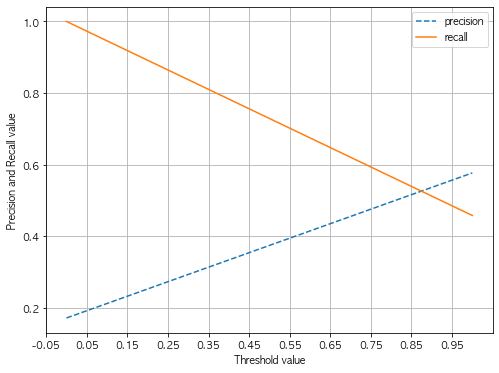

In [197]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0: threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold 값 X축의 Scale을 0,1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #X축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, dt_clf.predict_proba(X_test)[:, 1])

In [198]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.5106


In [199]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    #F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    #f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = dt_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[588  44]
 [ 71  60]]
정확도: 0.8493, 정밀도: 0.5769, 재현율: 0.4580, F1: 0.5106
임곗값: 0.45
오차 행렬
[[588  44]
 [ 71  60]]
정확도: 0.8493, 정밀도: 0.5769, 재현율: 0.4580, F1: 0.5106
임곗값: 0.5
오차 행렬
[[588  44]
 [ 71  60]]
정확도: 0.8493, 정밀도: 0.5769, 재현율: 0.4580, F1: 0.5106
임곗값: 0.55
오차 행렬
[[588  44]
 [ 71  60]]
정확도: 0.8493, 정밀도: 0.5769, 재현율: 0.4580, F1: 0.5106
임곗값: 0.6
오차 행렬
[[588  44]
 [ 71  60]]
정확도: 0.8493, 정밀도: 0.5769, 재현율: 0.4580, F1: 0.5106


In [200]:
from sklearn.metrics import roc_curve

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = dt_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
#반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출
#thresholds[0]은 max(예측확률)+1로 임의설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1,  thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index], 2))

#5step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [1]
샘플 index로 추출한 임곗값: [1.]
샘플 임곗값별 FPR:  [0.07]
샘플 임곗값별 TPR:  [0.458]


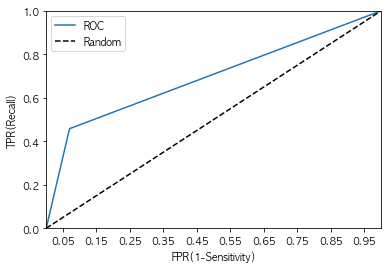

In [201]:
def roc_curve_plot(y_test, pred_proba_c1):
    #임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    #ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    #FPR X축의 Scale을 0.1단위로 변경, X,Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dt_clf.predict_proba(X_test)[:, 1])

In [202]:
from sklearn.metrics import roc_auc_score

#pred = lr_clf.predict(X_test)
#roc_curve = roc_auc_score(y_test, pred)

pred_proba = dt_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.6942


# 검증

In [137]:
df_21 = data[data['회계년도'] == 2021] #validate
X_21 = df_21[['ROE', '현금순환주기', '이자보상배율', '복리후생비', '영업이익증가율','매출총이익률', '총자산증가율', 
                '비정규직비율', '총자산회전율', '기말인원', '유형자산증가율', '평균근속연수', '당좌비율', '교육훈련비']]
y_21 = df_21['k1-Score_ad']
y_21 = y_21.apply(lambda x: 1 if(x=="부실" or x=="판정보류") else 0)
st = StandardScaler()
X_21 = st.fit_transform(X_21)
X_train, X_test, y_train, y_test = train_test_split(X_21, y_21, test_size=0.2, random_state=0)

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

#DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8824
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
